In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import peakutils
import math
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

from random import sample
from sklearn.utils import shuffle
#import pickle5 as pickle
import pickle
import time
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.stats.multitest as multitest
import statsmodels.stats.proportion as ssp

import matplotlib.colors as pltcl
from palettable.scientific.sequential import LaJolla_5,Devon_3
from palettable.scientific.diverging import Roma_12


#important for text to be detected when importing saved figures into illustrator
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

In [ ]:
# metainfopath: The path will contain metainformation of the experiment.
# resultfolderpath: The path will numpy array files which store zscored perievent activity and a summarized dataframe containing data for each cell.

rootpath = r"...\Data\Figure 3, 4, 5, S6, S7, S8"
metainfopath = os.path.join(rootpath, "meta")
resultfolderpath = os.path.join(rootpath, "data")
figurepath = os.path.join(rootpath, "figure")
statspath = os.path.join(rootpath, "stats")
clusteringpath = os.path.join(rootpath, "clustering")
for x in [figurepath,statspath,clusteringpath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [3]:
# load meta data
metainfo = pd.read_csv(os.path.join(metainfopath,"metainfo.csv"),index_col = False)
# load parameters saved in a dictionary file
with open(os.path.join(metainfopath,"parameter_dict.pickle"),'rb') as handle:
    parameter_dict = pickle.load(handle)

In [4]:
'''parameter_dict = { 'behavior_keys': [
  'Sniff',
  'Grooming',
  'Male_anogenital_sniffing',
  'Mount',
  'Intromission',  
  'Ejaculation',
  ],
  'status_keys': [
  'STAT',
  'STAT',
  'STAT',
  'STAT',
  'STAT',
  'POINT',
  ],
 'before_window': 5,
 'after_window': 15,
 'signal_framerate': 10,
 'video_framerate': 30,
 'before_frames': 50,
 'after_frames': 150,
 'onset': 1.033,
 'plot_key': True,
 'before_window_for_quantification': 5,
 'after_window_for_quantification': 5,
 'state_behavior_colors': [
  'orange',
  'green',
  'purple',
  'black',
  'red',],
 'state_behaviors': [
  'Sniff',
  'Grooming',
  'Male_anogenital_sniffing',
  'Mount',
  'Intromission',
  ],
 'state_behaviors_in_order': [
  'Sniff',
  'Grooming',
  'Male_anogenital_sniffing',
  'Mount',
  'Intromission',
  ],
 'state_behaviors_in_practical_name': [
  'Sniff',
  'Self-groom',
  'Ano. sniff',
  'Mount',
  'Intromission',
  ],
}
with open(os.path.join(metainfopath,"parameter_dict.pickle"),'wb') as handle:
    pickle.dump(parameter_dict,handle)'''

'parameter_dict = { \'behavior_keys\': [\n  \'Sniff\',\n  \'Grooming\',\n  \'Male_anogenital_sniffing\',\n  \'Mount\',\n  \'Intromission\',  \n  \'Ejaculation\',\n  ],\n  \'status_keys\': [\n  \'STAT\',\n  \'STAT\',\n  \'STAT\',\n  \'STAT\',\n  \'STAT\',\n  \'POINT\',\n  ],\n \'before_window\': 5,\n \'after_window\': 15,\n \'signal_framerate\': 10,\n \'video_framerate\': 30,\n \'before_frames\': 50,\n \'after_frames\': 150,\n \'onset\': 1.033,\n \'plot_key\': True,\n \'before_window_for_quantification\': 5,\n \'after_window_for_quantification\': 5,\n \'state_behavior_colors\': [\n  \'orange\',\n  \'green\',\n  \'purple\',\n  \'black\',\n  \'red\',],\n \'state_behaviors\': [\n  \'Sniff\',\n  \'Grooming\',\n  \'Male_anogenital_sniffing\',\n  \'Mount\',\n  \'Intromission\',\n  ],\n \'state_behaviors_in_order\': [\n  \'Sniff\',\n  \'Grooming\',\n  \'Male_anogenital_sniffing\',\n  \'Mount\',\n  \'Intromission\',\n  ],\n \'state_behaviors_in_practical_name\': [\n  \'Sniff\',\n  \'Self-groom\

In [5]:
# Unload the variables
signal_framerate = parameter_dict['signal_framerate']
before_frames = parameter_dict['before_frames']
after_frames = parameter_dict['after_frames']
before_window = parameter_dict['before_window']
after_window = parameter_dict['after_window']
after_window_for_quantification = parameter_dict['after_window_for_quantification']

In [6]:
# Load the preprocessed result.
# This will be used throughout the analysis.
# The result will store all the cells that were imaged and anlyzed, and averaged zscored peri event response magnitude.
# BEHAVIOR_positive_responding_cells/_negative_responding_cells: Columns indicating cells that respond to a BEHAVIOR. abs(magnitude_zscore) > 2 was chategorized as "responding_cell".
# magnitude_cell_types: The cell type class which is used for further analysis. 
# This class will contain a label indicating whever it is a positive responding cell to Sniff, Mount, or Ejaculation or a cobination of the three.

analysis_metainfo = pd.read_csv(os.path.join(resultfolderpath,'male_analysis_magnitude.csv'),index_col = None)

In [7]:
# Load cell map information
# The spatial cell map is stored in a dictionary file.
# keys: ID of subject
# The sub keys are 
# names: the name of cell
# x_list: the x coordinate of the cell center
# y_list: the y coordinate of the cell center
# mask: 2d array of FOV with mask of the cells. Value in each mask indicate cell id.

with open(os.path.join(resultfolderpath,"cell_map_dict.pickle"),'rb') as handle:
    cell_map_dict = pickle.load(handle)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure 3H

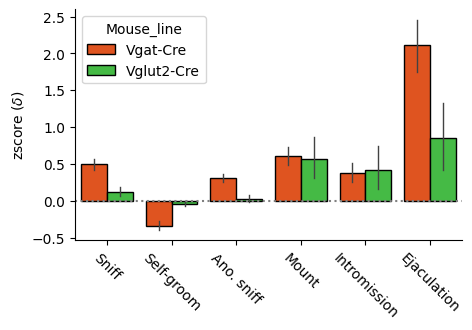

In [9]:
# Plot the magnitude of peri event responses as a bar plot for Figure 3H.
# The individual unit will be cells.

# Reformat the result file for plotting
analysis_metainfo_stack = analysis_metainfo.set_index(list(analysis_metainfo.columns[~analysis_metainfo.columns.str.contains('_zscore_magnitude')]))\
    .stack().reset_index().rename(columns = {'level_' + str(len(analysis_metainfo.columns[~analysis_metainfo.columns.str.contains('_zscore_magnitude')])):'Variable',0:'Value'})
    
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
behaviors = [f+'_zscore_magnitude' for f in behaviors]
xticklabels = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']
# plot the zscore 
fig,axs = plt.subplots(1,1,figsize = (5,3))
sns.barplot(data = analysis_metainfo_stack\
    ,x = 'Variable',y = 'Value',hue='Mouse_line',ax = axs,order = behaviors,lw = 1,edgecolor = 'black',errwidth = 1,palette = ['orangered','limegreen'])
axs.axhline(y = 0,ls = ':',color = 'gray')
axs.set_xticklabels(xticklabels,rotation = -45)
axs.set_ylabel('zscore ($\delta$)')
axs.set_xlabel('')
sns.despine()
fig.savefig(os.path.join(figurepath,'Figure3H.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure3H.pdf'),format = 'svg',bbox_inches = 'tight')

In [10]:
# Statistical test for Figure 3H
pvalues = []
statistics = []
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
behaviors = [f+'_zscore_magnitude' for f in behaviors]

for behavior in behaviors:
    statistic,pvalue = stats.ttest_ind(analysis_metainfo_stack[(analysis_metainfo_stack['Mouse_line'] == 'Vgat-Cre')&
    (analysis_metainfo_stack['Variable'] == behavior)].Value,
analysis_metainfo_stack[(analysis_metainfo_stack['Mouse_line'] == 'Vglut2-Cre')&
    (analysis_metainfo_stack['Variable'] == behavior)].Value)

    #print(behavior,df,pvalue)
    pvalues.append(pvalue)
    statistics.append(statistic)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_Vgat = analysis_metainfo_stack[(analysis_metainfo_stack['Mouse_line'] == 'Vgat-Cre')&
    (analysis_metainfo_stack['Variable'] == behavior)].Value.shape[0]
n_Vglut2 = analysis_metainfo_stack[(analysis_metainfo_stack['Mouse_line'] == 'Vglut2-Cre')&
    (analysis_metainfo_stack['Variable'] == behavior)].Value.shape[0]


Figure3H_ttest_bonferroni_correction = multitest.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvalues,__,__) = Figure3H_ttest_bonferroni_correction
# Print the statistical test results
for idx,behavior in enumerate(behaviors):
    print(behavior,corr_pvalues[idx])
    # Append the Wilcoxon result to manuscript_statistic_file
    ttest_bonferroni_correction = pd.DataFrame([{
        'Figure': 'Figure3H',
        'variable':f'{behavior}',
        'Type of Test': 't-test with BH correction',
        'Detail': f'Vgat vs Vglut2',
        'statistic description': f't({n_Vgat + n_Vglut2-2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest_bonferroni_correction], ignore_index=True)


# save results
import pickle
with open(os.path.join(statspath,'Figure3H_ttest_bonferroni_correction.pickle'), 'wb') as handle:
    pickle.dump(Figure3H_ttest_bonferroni_correction, handle, protocol=pickle.HIGHEST_PROTOCOL)


Sniff_zscore_magnitude 1.0791689227944602e-09
Grooming_zscore_magnitude 5.894171310640177e-12
Male_anogenital_sniffing_zscore_magnitude 3.4145304515790145e-10
Mount_zscore_magnitude 1.0
Intromission_zscore_magnitude 1.0
Ejaculation_zscore_magnitude 0.0004194710227051168


# FIgure 3F

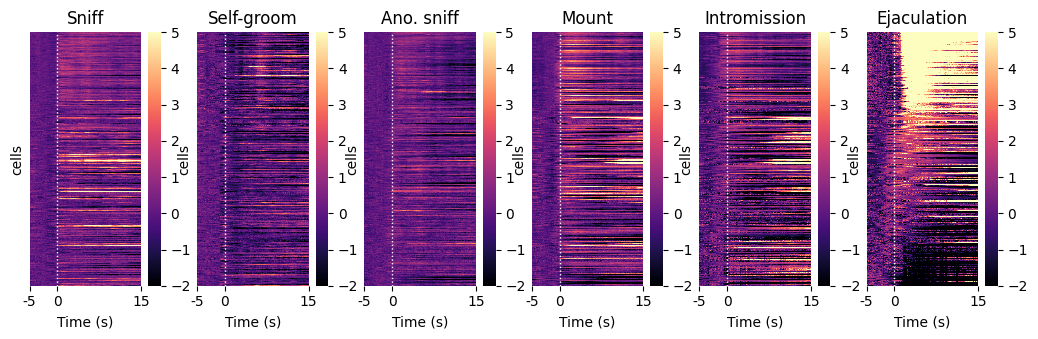

In [11]:
# Plot a heatmap displaying zscore calcium signals to each behavior.

# plot Vgat cells
Mouse_line = 'Vgat-Cre'

# adjust the height of the plot based on the number of cells
height = (5/analysis_metainfo.shape[0])* analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].shape[0]

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The cells will be sorted based on the response magnitude sort_key variable
sort_key = 'Ejaculation'

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].index

zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

# Plot the heatmap
fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        

    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure3F-Vgat.png'),
           dpi = 512,format = 'png',bbox_inches='tight')

fig.savefig(os.path.join(figurepath,'Figure3F-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches='tight')

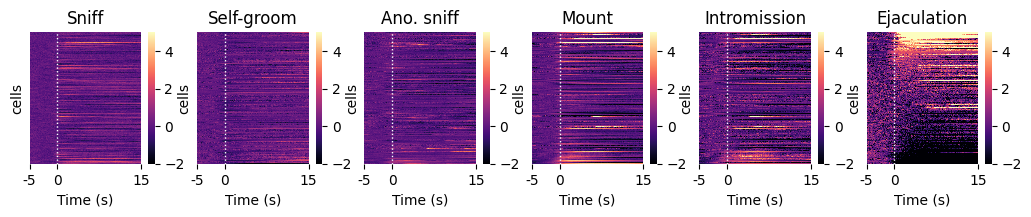

In [12]:
# Plot a heatmap displaying zscore calcium signals to each behavior.

# plot Vgat cells
Mouse_line = 'Vglut2-Cre'

# adjust the height of the plot based on the number of cells
height = (5/analysis_metainfo.shape[0])* analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].shape[0]

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The cells will be sorted based on the response magnitude sort_key variable
sort_key = 'Ejaculation'

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].index

zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

# Plot the heatmap
fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        

    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure3F-Vgat.png'),
           dpi = 512,format = 'png',bbox_inches='tight')

fig.savefig(os.path.join(figurepath,'Figure3F-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches='tight')

# Figure 3G

Plotting  Ejaculation  cells. # of cells:  522
Plotting  Ejaculation  cells. # of cells:  271


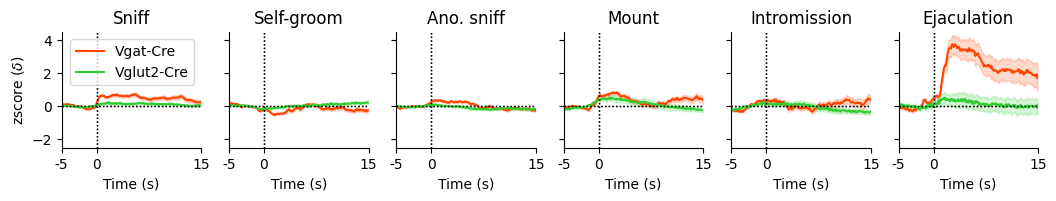

In [13]:
# Plot an average of the zscored calcium signals of Vgat and Vglut2 cells as a lineplot

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']


fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),1.5),sharey = True,sharex = True)
for midx,Mouse_line in enumerate(['Vgat-Cre','Vglut2-Cre']):
    subset_index = np.where(analysis_metainfo.Mouse_line == Mouse_line)[0]

    print("Plotting ",sort_key," cells. # of cells: ",len(subset_index))

    for idx,behavior in enumerate(behaviors):

        axs = ax[idx]
        zscores = np.load(os.path.join(resultfolderpath,behavior +'_all_norm_zscore_snip_array.npy'))
        temparray = zscores[:,subset_index]
        tempdf = pd.DataFrame(temparray,index = np.linspace(-5,14.9,200)).stack().reset_index()
        tempdf.columns = ['Time (s)','cell_id','zscore']
        sns.lineplot(data = tempdf, x = 'Time (s)',y = 'zscore',ax = axs,label = Mouse_line,color = ['orangered','limegreen'][midx])
        axs.set_xticks([-5,0,15])
        axs.set_xticklabels([-5,0,15],rotation = 0)
        axs.axvline(0,color = 'black',linestyle = ':',linewidth = 1)
        axs.axhline(0,color = 'black',linestyle = ':',linewidth = 1)
        ncells = temparray.shape[0]
        axs.set_xlim(-before_window,after_window)
        axs.set_ylim(-2.5,4.5)
        axs.set_ylabel('zscore ($\delta$)')
        axs.set_xlabel('Time (s)')
        axs.set_title(titles[idx])
        axs.get_legend().remove()
    ax[0].legend()
sns.despine()

fig.savefig(os.path.join(figurepath,'Figure3G.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure3G.pdf'),format = 'pdf',bbox_inches='tight')

# Figure 3I

In [14]:
# Preprocess the data frame before plotting the proportino of cells that were chategorized as a responding cell.

analysis_behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']


import statsmodels.stats.proportion as ssp

Mouse_line_labels = analysis_metainfo.Mouse_line.unique()

# First create a dictionary that contains the number of positive/negative and neutral responding cells to each behavior.

value_dict = {}
for iidx,Mouse_line in enumerate(Mouse_line_labels):
    value_array = []
    for idx,behavior in enumerate(analysis_behaviors):
        all_cells = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].index
        positive_responding_cells = np.intersect1d(np.where(analysis_metainfo[behavior + '_positive_responding_cells'])[0],all_cells)
        negative_responding_cells = np.intersect1d(np.where(analysis_metainfo[behavior + '_negative_responding_cells'])[0],all_cells)
        neutral_cells = len(all_cells) - len(positive_responding_cells) - len(negative_responding_cells)
        
        values = np.array([len(positive_responding_cells),len(negative_responding_cells),len(all_cells) - len(positive_responding_cells) - len(negative_responding_cells)])
        value_array.append(values)
    value_dict[Mouse_line] = np.array(value_array)

# Next, convert the dictionaries to a dataframe to make the plotting easier.

for iidx,Mouse_line in enumerate(Mouse_line_labels):

    tempdf = pd.DataFrame(value_dict[Mouse_line],index = analysis_behaviors,columns = ['positive','negative','neutral'])
    tempdf = tempdf.stack().reset_index()
    tempdf.columns = ['Behavior','Type','Number_of_cells']
    tempdf['Mouse_line'] = len(tempdf) * [Mouse_line]
    if iidx == 0:
        summary_df = tempdf
    else:
        summary_df = pd.concat([summary_df,tempdf],axis = 0 )

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\2528908225.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data = tempdf,stat = 'count',hue_order = ['negative','positive',],shrink = 0.35,\
C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\2528908225.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(titles,rotation = -45)


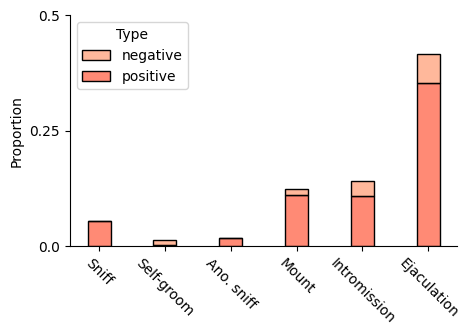

In [15]:
# Plot the proportion of cells that were chategorized as a responding cell.
# First plot the Vgat cells
Mouse_line = 'Vgat-Cre'

tempdf = summary_df[summary_df.Mouse_line == Mouse_line]
fig,axs = plt.subplots(1,1,figsize = (5,3))
sns.histplot(data = tempdf,stat = 'count',hue_order = ['negative','positive',],shrink = 0.35,\
            x = 'Behavior',weights ='Number_of_cells',hue ='Type',multiple = 'stack',palette = ['lightsalmon','tomato','gray'],ax = axs)
axs.set_xticklabels(titles,rotation = -45)
axs.set_yticks(np.linspace(0,len(analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line]),5))
axs.set_yticklabels(np.linspace(0,1,5))
axs.set_ylim(0,len(analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line])/2)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('Proportion')
fig.savefig(os.path.join(figurepath,'Figure3I-{}.png'.format(Mouse_line)),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure3I-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\1237269323.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data = tempdf,stat = 'count',hue_order = ['negative','positive',],shrink = 0.35,\
C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\1237269323.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(titles,rotation = -45)


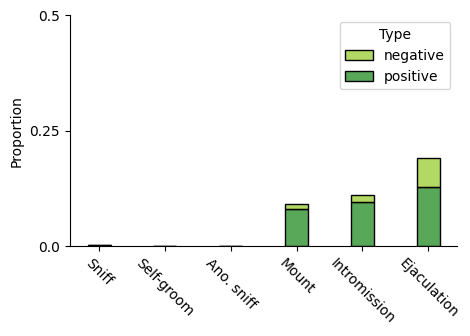

In [16]:
# Plot the proportion of cells that were chategorized as a responding cell.
# Next plot the Vglut2 cells

Mouse_line = 'Vglut2-Cre'

tempdf = summary_df[summary_df.Mouse_line == Mouse_line]
fig,axs = plt.subplots(1,1,figsize = (5,3))
sns.histplot(data = tempdf,stat = 'count',hue_order = ['negative','positive',],shrink = 0.35,\
            x = 'Behavior',weights ='Number_of_cells',hue ='Type',multiple = 'stack',palette = ['yellowgreen','forestgreen','gray'],ax = axs)
axs.set_xticklabels(titles,rotation = -45)
axs.set_yticks(np.linspace(0,len(analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line]),5))
axs.set_yticklabels(np.linspace(0,1,5))
axs.set_ylim(0,len(analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line])/2)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('Proportion')
fig.savefig(os.path.join(figurepath,'Figure3I-{}.png'.format(Mouse_line)),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure3I-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

# Figure 3I

In [17]:
# Conduct chi-square test to test difference in the proportion of cells that positively responded to each behavior.

pvalues = []
chistats = []
responding_cells_lists = []

for idx,behavior in enumerate(analysis_behaviors):
    responding_cells = np.where(((analysis_metainfo[(behavior + '_positive_responding_cells')])))[0]
    responding_cells_list = [len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].index)),
    len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].index))]
    responding_cells_list = [len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].index)),
    len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].index))]
    total_cells = [len(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre']),len(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'])]

    (chi2, p, arr) = ssp.proportions_chisquare(count = responding_cells_list, nobs = total_cells)
    pvalues.append(p)
    chistats.append(chi2)
    responding_cells_lists.append(responding_cells_list)

# correct multiple comparison
Figure3I_chisquare_bonferroni_correction_positive_cells = multitest.multipletests(pvalues,method = 'bonferroni')
(reject,corr_pvalues,__,__) = Figure3I_chisquare_bonferroni_correction_positive_cells
[print(behavior,':',corr_p) for behavior,corr_p in zip(analysis_behaviors,corr_pvalues)]


# Print the statistical test results
for idx,behavior in enumerate(behaviors):
    print(behavior,corr_pvalues[idx])
    # Append the Wilcoxon result to manuscript_statistic_file
    ttest_bonferroni_correction = pd.DataFrame([{
        'Figure': 'Figure3I',
        'variable':f'Proportion of {behavior} positive responding cells',
        'Type of Test': 'chisquare test with BH correction',
        'Detail': f'Vgat {responding_cells_lists[idx][0]}/{total_cells[0]} cells vs\
             Vglut2 {responding_cells_lists[idx][1]}/{total_cells[1]} cells',
        'statistic description': f'chi2stat',  # Showing "n" for each group
        'statistic': chistats[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest_bonferroni_correction], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,'Figure3I_chisquare_bonferroni_correction_positive_cells.pickle'), 'wb') as handle:
    pickle.dump(Figure3H_ttest_bonferroni_correction, handle, protocol=pickle.HIGHEST_PROTOCOL)

Sniff : 0.0016947157314960567
Grooming : 1.0
Male_anogenital_sniffing : 0.17825411018615267
Mount : 1.0
Intromission : 1.0
Ejaculation : 1.516062976306207e-10
Sniff 0.0016947157314960567
Grooming 1.0
Male_anogenital_sniffing 0.17825411018615267
Mount 1.0
Intromission 1.0
Ejaculation 1.516062976306207e-10


In [18]:
# Conduct chi-square test to test difference in the proportion of cells that negatively responded to each behavior.

pvalues = []
chistats = []
responding_cells_lists = []

for idx,behavior in enumerate(analysis_behaviors):
    responding_cells = np.where(((analysis_metainfo[(behavior + '_negative_responding_cells')])))[0]
    responding_cells_list = [len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].index)),
    len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].index))]
    responding_cells_list = [len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].index)),
    len(np.intersect1d(responding_cells,analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].index))]
    total_cells = [len(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre']),len(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'])]

    (chi2, p, arr) = ssp.proportions_chisquare(count = responding_cells_list, nobs = total_cells)
    pvalues.append(p)
    chistats.append(chi2)
    responding_cells_lists.append(responding_cells_list)

# correct multiple comparison
Figure3I_chisquare_bonferroni_correction_negative_cells = multitest.multipletests(pvalues,method = 'bonferroni')
(reject,corr_pvalues,__,__) = Figure3I_chisquare_bonferroni_correction_negative_cells
[print(behavior,':',corr_p) for behavior,corr_p in zip(analysis_behaviors,corr_pvalues)]


# Print the statistical test results
for idx,behavior in enumerate(behaviors):
    print(behavior,corr_pvalues[idx])
    # Append the Wilcoxon result to manuscript_statistic_file
    ttest_bonferroni_correction = pd.DataFrame([{
        'Figure': 'Figure3I',
        'variable':f'Proportion of {behavior} negative responding cells',
        'Type of Test': 'chisquare test with BH correction',
        'Detail': f'Vgat {responding_cells_lists[idx][0]}/{total_cells[0]} cells vs\
             Vglut2 {responding_cells_lists[idx][1]}/{total_cells[1]} cells',
        'statistic description': f'chi2stat',  # Showing "n" for each group
        'statistic': chistats[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest_bonferroni_correction], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,'Figure3I_chisquare_bonferroni_correction_negative_cells.pickle'), 'wb') as handle:
    pickle.dump(Figure3H_ttest_bonferroni_correction, handle, protocol=pickle.HIGHEST_PROTOCOL)

Sniff : nan
Grooming : 0.6362448042245556
Male_anogenital_sniffing : nan
Mount : 1.0
Intromission : 0.8312495952721963
Ejaculation : 1.0
Sniff nan
Grooming 0.6362448042245556
Male_anogenital_sniffing nan
Mount 1.0
Intromission 0.8312495952721963
Ejaculation 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [19]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)

# Figure S6B


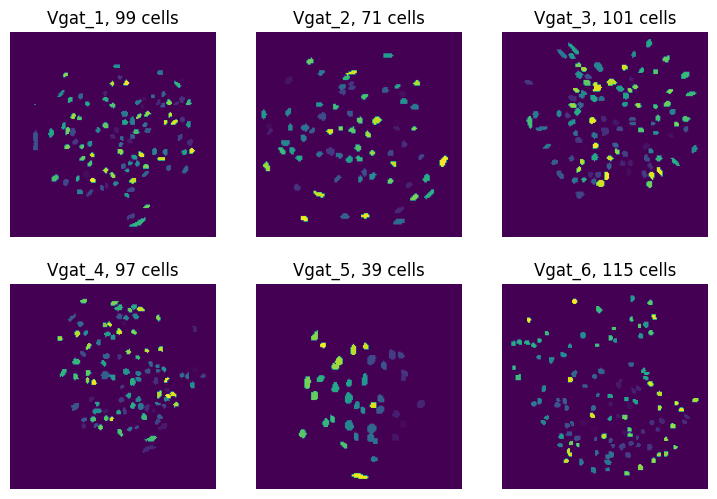

In [20]:
# Plot the cell map for each subject
# First plot Vgat cells
Mouse_line = 'Vgat-Cre'

IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()
fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    n_cells = int(np.max(cell_map_dict[data_key]['mask']))
    axs.flat[d_idx].imshow(cell_map_dict[data_key]['mask'])
    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {str(n_cells)} cells",fontsize = 12)
fig.savefig(os.path.join(figurepath,'FigureS6B_{}.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'FigureS6B_{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

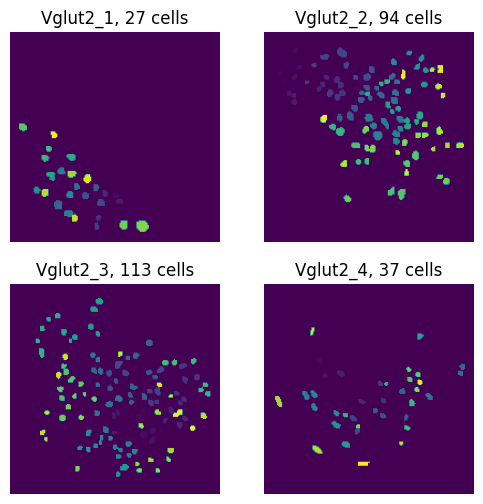

In [21]:
# Plot the cell map for each subject
# First plot Vgat cells
Mouse_line = 'Vglut2-Cre'

IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()
fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    n_cells = int(np.max(cell_map_dict[data_key]['mask']))
    axs.flat[d_idx].imshow(cell_map_dict[data_key]['mask'])
    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {str(n_cells)} cells",fontsize = 12)
fig.savefig(os.path.join(figurepath,'FigureS4B_{}.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'FigureS4B_{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

# Figure 4A

In [22]:
# Read data
analysis_metainfo = pd.read_csv(os.path.join(resultfolderpath,'male_analysis_magnitude.csv'),index_col = None)

271  cells found for  Sniff


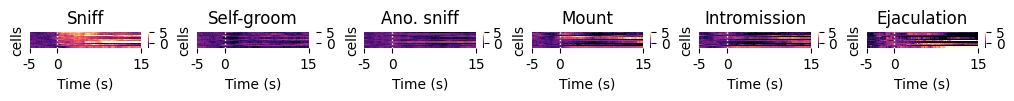

In [23]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# First plot for cells only responding to Sniff.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Sniff'
celltype = sort_key +'_only_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

print(len(subset_index), " cells found for ", sort_key)

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.pdf'),format = 'pdf',bbox_inches = 'tight')    

48  cells found for  Mount


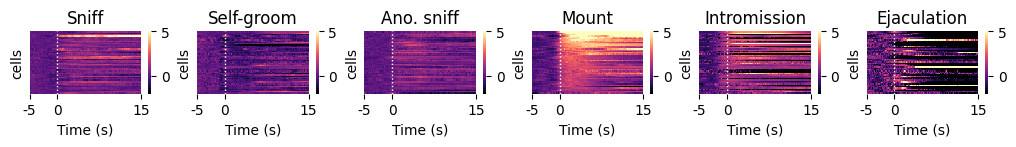

In [24]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells only responding to Mount.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Mount'
celltype = sort_key +'_only_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", sort_key)

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

178  cells found for  Ejaculation


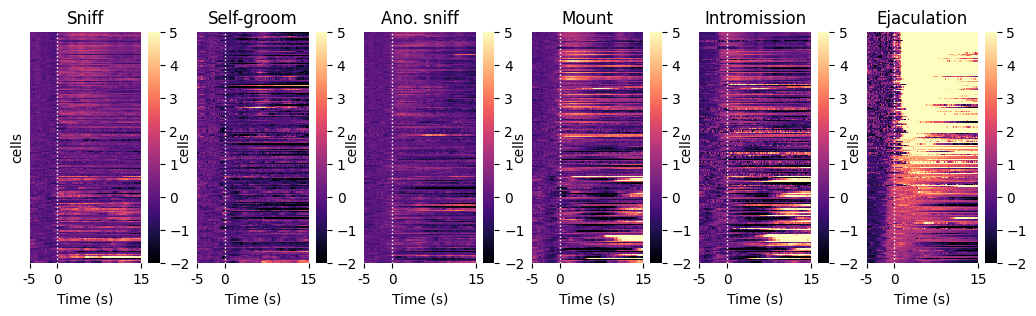

In [25]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells only responding to Ejaculation.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Ejaculation'
celltype = sort_key +'_only_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", sort_key)

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+sort_key+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

26  cells found for  Mount_Ejaculation_cells


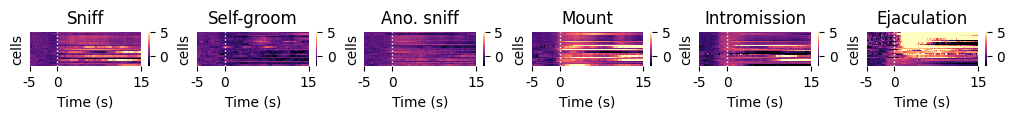

In [26]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells responding to Mount and Ejaculation.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Ejaculation'
celltype = 'Mount_Ejaculation_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", celltype)

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

12  cells found for  Ejaculation_Sniff_cells


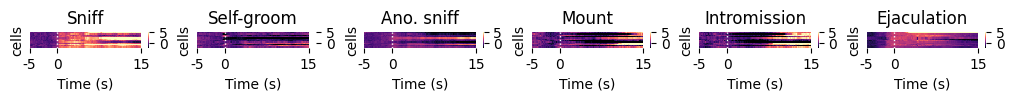

In [27]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells responding to Ejaculation and Sniff.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Ejaculation'
celltype = 'Ejaculation_Sniff_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", celltype)


# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

3  cells found for  Mount_Sniff_cells


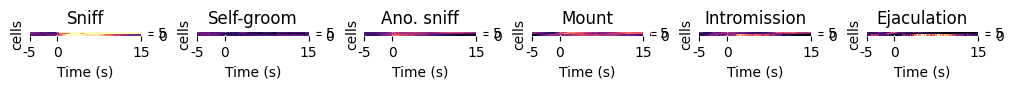

In [28]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells responding to Mount and Sniff.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Mount'
celltype = 'Mount_Sniff_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", celltype)

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

3  cells found for  Sniff_Mount_Ejaculation_cells


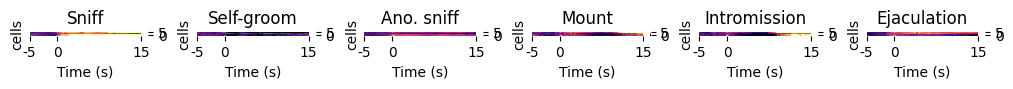

In [29]:
# Plot a heatmap displaying zscore calcium signals of cells for each cell type class, defined in the magnitude_cell_types class.
# Plot for cells responding to Sniff, Mount and Ejaculation.

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Ejaculation'
celltype = 'Sniff_Mount_Ejaculation_cells'

# Adjust the height of plot based on the number of cells
height = (3/analysis_metainfo[analysis_metainfo['magnitude_cell_types']\
     == 'Ejaculation_only_cells'].shape[0])\
        * analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].shape[0]

# The subset_index will be the index of the cells that you want to plot. In this case the 'Vglut2-Cre' cells
subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index
print(len(subset_index), " cells found for ", celltype)

# Create a sortindex array used to sort cells based on the response magnitude
zscores = np.load(os.path.join(resultfolderpath,sort_key+'_all_norm_zscore_snip_array.npy'))
zscores = zscores[:,subset_index]
temparray = zscores.T
sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),height),sharey = True,sharex = True)

for idx,behavior in enumerate(behaviors):
    
    axs = ax[idx]
    zscores = np.load(os.path.join(resultfolderpath,behavior+'_all_norm_zscore_snip_array.npy'))
    zscores = zscores[:,subset_index]
    temparray = zscores.T        
    #sor tindex = np.arange(len(temparray))
    
    sns.heatmap(temparray[sortindex,:],ax = axs,vmax = 5,vmin = -2,cmap = 'magma',rasterized = True)
    axs.set_xticks([0,50,200])
    axs.set_xticklabels([-5,0,15],rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = temparray.shape[0]
    axs.set_yticks([])
    #axs.set_yticks(np.linspace(0,np.round(ncells,-1),6))
    #axs.set_yticklabels(np.linspace(0,np.round(ncells,-1),6,dtype=int),rotation = 0)

    axs.set_ylabel('cells')
    axs.set_xlabel('Time (s)')
    axs.set_title(titles[idx])
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4A-'+celltype+'.pdf'),format = 'pdf',bbox_inches = 'tight')       

# Figure 4B

Plotting  Sniff_only_cells  cells. # of cells:  12
Plotting  Mount_only_cells  cells. # of cells:  48
Plotting  Ejaculation_only_cells  cells. # of cells:  178


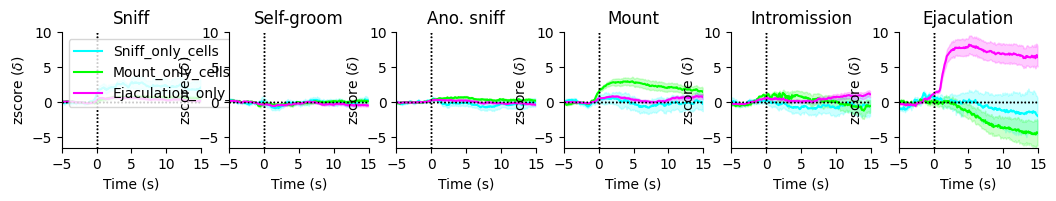

In [30]:
# Plot an average of the zscored calcium signals of cells only responding to Sniff, Mount and Ejaculation as a lineplot

# specify the type of behaviors you want to plot
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# The heatmap will be sorted based on the sort_key variable
sort_key = 'Ejaculation'
celltypes = ['Sniff_only_cells','Mount_only_cells','Ejaculation_only_cells']

fig,ax = plt.subplots(1,len(behaviors),figsize = (2.1*len(behaviors),1.5),sharey = False,sharex = True)
for cidx,celltype in enumerate(celltypes):
    subset_index = analysis_metainfo[analysis_metainfo['magnitude_cell_types'] == celltype].index 
    print("Plotting ",celltype," cells. # of cells: ",len(subset_index))

    vmaxs = [8,8,2,2,2,2,2,8]
    vmins = [-4,-4,-1,-1,-1,-1,-1,-4]
    for idx,behavior in enumerate(behaviors):

        axs = ax[idx]
        zscores = np.load(os.path.join(resultfolderpath,behavior + '_all_norm_zscore_snip_array.npy'))
        #zscores = zscores[:,subset_index]
        temparray = zscores[:,subset_index]
        temparray = temparray.T
        sortindex = np.argsort(np.mean(temparray[:,before_frames:before_frames+after_frames],axis = 1))[::-1] 

        tempdf = pd.DataFrame(temparray[sortindex,:].T,index = np.linspace(-5,14.9,200)).stack().reset_index()
        tempdf.columns = ['Time (s)','cell_id','zscore']
        sns.lineplot(data = tempdf, x = 'Time (s)',y = 'zscore',ax = axs,label = celltype,color = ['cyan','lime','magenta'][cidx])
        axs.set_xticks(np.linspace(-before_window,after_window,int((before_frames+after_frames)/(signal_framerate*5)) +1 ))
        #axs.set_xticklabels(np.linspace(-before_window,after_window,int((before_frames+long_event_duration_frames)/(signal_framerate*5)) +1 )\
        #                    ,rotation = 0)
        axs.axvline(0,color = 'black',linestyle = ':',linewidth = 1)
        axs.axhline(0,color = 'black',linestyle = ':',linewidth = 1)
        ncells = temparray.shape[0]
        axs.set_xlim(-before_window,after_window)
        axs.set_ylim(-6.5,10)
        axs.set_ylabel('zscore ($\delta$)')
        axs.set_xlabel('Time (s)')
        axs.set_title(titles[idx])
        axs.get_legend().remove()
    ax[0].legend()
sns.despine()

fig.savefig(os.path.join(figurepath,'Figure4B.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4B.pdf'),format = 'pdf',bbox_inches = 'tight')     

# Figure 4C

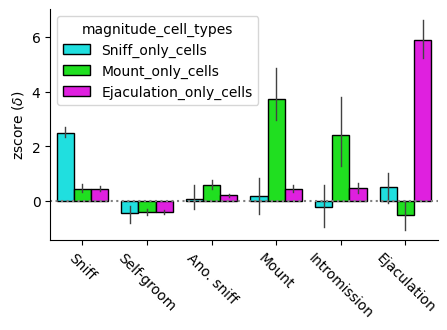

In [31]:
# Plot the magnitude of peri event responses as a bar plot for Figure 3H.
# The individual unit will be cells.

# Reformat the result file for plotting
analysis_metainfo_stack = analysis_metainfo.set_index(list(analysis_metainfo.columns[~analysis_metainfo.columns.str.contains('_zscore_magnitude')]))\
    .stack().reset_index().rename(columns = {'level_' + str(len(analysis_metainfo.columns[~analysis_metainfo.columns.str.contains('_zscore_magnitude')])):'Variable',0:'Value'})


behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
behaviors = [f+'_zscore_magnitude' for f in behaviors]

# plot the zscore 
xticklabels = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# plot the zscore 
fig,axs = plt.subplots(1,1,figsize = (5,3))
sns.barplot(data = analysis_metainfo_stack\
    ,x = 'Variable',y = 'Value',hue='magnitude_cell_types',ax = axs,order = behaviors,palette = ['cyan','lime','magenta'],\
           hue_order = ['Sniff_only_cells','Mount_only_cells','Ejaculation_only_cells'],lw = 1,edgecolor = 'black',errwidth = 1)
axs.set_xticklabels(xticklabels,rotation = -45)
axs.set_ylabel('zscore ($\delta$)')
axs.set_xlabel('')
sns.despine()
axs.axhline(y = 0,ls = ':',color = 'gray')
fig.savefig(os.path.join(figurepath,'Figure4C.png'),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4C.pdf'),format = 'svg',bbox_inches = 'tight')

In [33]:
# Test whether there is any difference in the average zscore magnitude of each cell type for each behavior.

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# specify cell types to test
celltypes = ['Sniff_only_cells','Mount_only_cells','Ejaculation_only_cells']

# specify behavior to test
behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
behavior_values = [f+'_zscore_magnitude' for f in behaviors]

# ANOVA for each type of behavior
pvals = []
for name,behavior in zip(behaviors,behavior_values):
    tdf = analysis_metainfo_stack[(analysis_metainfo_stack.Variable == behavior)&\
                                               (analysis_metainfo_stack.magnitude_cell_types.isin(celltypes))]
    moore_lm = ols('Value ~ C(magnitude_cell_types)',\
                   data=tdf).fit()
    table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
    #print(moore_lm.summary())

    # Extract ANOVA results
    anova_df1 = table['df'].values[0]  # Between-subject df
    anova_df2 = table['df'].values[1]  # Error df
    anova_F = table['F'].values[0]
    anova_p = table['PR(>F)'].values[0]
    # Append ANOVA result to DataFrame (using pd.concat instead of append)
    anova_data = pd.DataFrame([{
        'Figure': 'Figure4C',
        'variable':behavior,
        'Type of Test': 'One-way ANOVA',
        'Detail': 'across states',
        'statistic description': f'F({anova_df1},{anova_df2})',
        'statistic': anova_F,
        'p Value': anova_p
    }])
    

    print(behavior)
    print('#####')
    print(table)
    pvals.append(anova_p)
    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

    # Run Tukey's HSD test
    tukey_results = pairwise_tukeyhsd(tdf['Value'],tdf['magnitude_cell_types'])
    tukey_summary = tukey_results.summary()

    # Save the Tukey results to a file
    with open(os.path.join(statspath, f'Figure4C_{behavior}_TukeyHSD.pickle'), 'wb') as handle:
        pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

    # Append Tukey HSD results to DataFrame
    for comparison in tukey_summary.data[1:]:
        group1, group2, meandiff, p_adj, lower, upper, reject = comparison

        # Append posthoc result to DataFrame (using pd.concat instead of append)
        ttukeyHSD_df = pd.DataFrame([{
            'Figure': 'Figure4C',
            'variable':behavior,
            'Type of Test': 'Tukey HSD',
            'Detail': f'{group1} vs {group2}',
            'statistic description': 'N/A',
            'statistic': meandiff,
            'p Value': p_adj
        }])

        # Concatenate the new data with the existing results DataFrame
        manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

Sniff_zscore_magnitude
#####
                            sum_sq     df          F        PR(>F)
C(magnitude_cell_types)  47.758033    2.0  73.351856  1.768576e-25
Residual                 76.502071  235.0        NaN           NaN
Grooming_zscore_magnitude
#####
                            sum_sq     df         F    PR(>F)
C(magnitude_cell_types)   0.044623    2.0  0.088897  0.914971
Residual                 58.980531  235.0       NaN       NaN
Male_anogenital_sniffing_zscore_magnitude
#####
                            sum_sq     df          F    PR(>F)
C(magnitude_cell_types)   5.824518    2.0  12.340249  0.000008
Residual                 55.459248  235.0        NaN       NaN
Mount_zscore_magnitude
#####
                             sum_sq     df          F        PR(>F)
C(magnitude_cell_types)  415.345591    2.0  68.315092  4.096696e-24
Residual                 714.382515  235.0        NaN           NaN
Intromission_zscore_magnitude
#####
                              sum_sq     df   

# Figure 4D

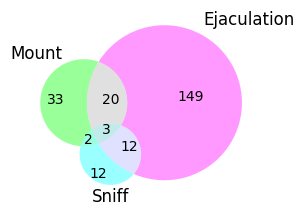

In [34]:
# Plot a venn diagram to show the overlap of the celsl that positively respond to Sniff, Mount and Ejaculation.
# First plot Vgat cells.

from matplotlib_venn import venn3, venn3_circles
fig,axs = plt.subplots(1,1,figsize = (3,3))
Mouse_line = 'Vgat-Cre'
all_cells = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].index
axs = venn3([set(np.intersect1d(analysis_metainfo[analysis_metainfo['Mount_positive_responding_cells']].index,all_cells)),\
             set(np.intersect1d(analysis_metainfo[analysis_metainfo['Ejaculation_positive_responding_cells']].index,all_cells)),\
             set(np.intersect1d(analysis_metainfo[analysis_metainfo['Sniff_positive_responding_cells']].index,all_cells)),],\
            set_labels = ['Mount','Ejaculation','Sniff'],set_colors = ['lime','magenta','cyan'])
fig.savefig(os.path.join(figurepath,'Figure4D-{}.png'.format(Mouse_line)),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4D-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

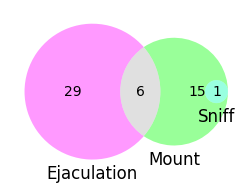

In [35]:
# Plot a venn diagram to show the overlap of the celsl that positively respond to Sniff, Mount and Ejaculation.
# First plot Vglut2 cells.

from matplotlib_venn import venn3, venn3_circles
fig,axs = plt.subplots(1,1,figsize = (3,3))
Mouse_line = 'Vglut2-Cre'
all_cells = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].index
axs = venn3([set(np.intersect1d(analysis_metainfo[analysis_metainfo['Mount_positive_responding_cells']].index,all_cells)),\
             set(np.intersect1d(analysis_metainfo[analysis_metainfo['Ejaculation_positive_responding_cells']].index,all_cells)),\
             set(np.intersect1d(analysis_metainfo[analysis_metainfo['Sniff_positive_responding_cells']].index,all_cells)),],\
            set_labels = ['Mount','Ejaculation','Sniff'],set_colors = ['lime','magenta','cyan'])
fig.savefig(os.path.join(figurepath,'Figure4D-{}.png'.format(Mouse_line)),format = 'png',bbox_inches = 'tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure4D-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches = 'tight')

# Figure 4E

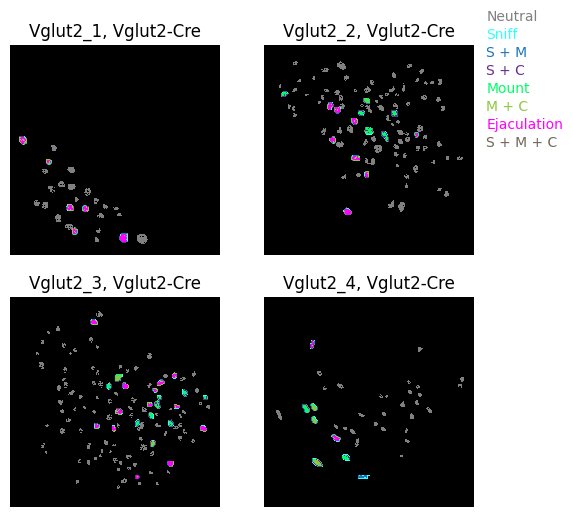

In [36]:
# Plot the cell types defnied by response magnitude onto the cell map.

# First setup parameters.
types =     ['not_classified',
            'Sniff_only_cells',
            'Mount_Sniff_cells',
            'Ejaculation_Sniff_cells',
            'Mount_only_cells',
            'Mount_Ejaculation_cells',
            'Ejaculation_only_cells',
            'Sniff_Mount_Ejaculation_cells',
            ''
            ]
colors =    ['k',
            'gray',
            '#33FFFF',
            '#1C75BC',
            '#662D91',
            '#00FF66',
            '#8DC63F',
            '#FF00FF',
            '#726658',
            'white']
labels =    ['',
            'Neutral',
            'Sniff',
            'S + M',
            'S + C',
            'Mount',
            'M + C',
            'Ejaculation',
            'S + M + C',
            ''
            ]
plt.style.use('default')

# Plot the cell maps for Vglut2 cells
Mouse_line = 'Vglut2-Cre'
IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()

fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    mask = cell_map_dict[data_key]['mask']
    cell_type_list = np.array(['None'] * int(np.max(mask)),dtype ='object')
    cell_type_map = np.zeros(mask.shape)

    for bidx,TYPE in enumerate(types):
        __,__,cells = np.intersect1d(analysis_metainfo[analysis_metainfo.magnitude_cell_types == TYPE].index,\
                                     analysis_metainfo[analysis_metainfo.data_key == data_key].index,\
                              return_indices = True)
        #print(cells)
        cell_type_list[cells] = TYPE
    
    for tidx,t in enumerate(types):
        #print("Processing {} and adding {}".format(t,tidx))
        for cidx,cell in    enumerate(np.where(cell_type_list == t)[0]):

            cell_type_map[mask == cell +1] = tidx+1

    cmap = mpl.colors.ListedColormap(colors)
    boundaries = range(len(colors))
    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)    
    axs.flat[d_idx].imshow(cell_type_map,cmap =cmap , norm=norm)

    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {Mouse_line}",fontsize = 12)
[fig.text(s = labels[sidx],x = 0.92,y = 0.95 - sidx * 0.03,c = colors[sidx]) for sidx in range(len(types))]
fig.savefig(os.path.join(figurepath,'Figure4E_{}_cell_type_map.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure4E_{}_cell_type_map.pdf'.format(Mouse_line)),dpi = 1028,format = 'pdf',bbox_inches = 'tight')    


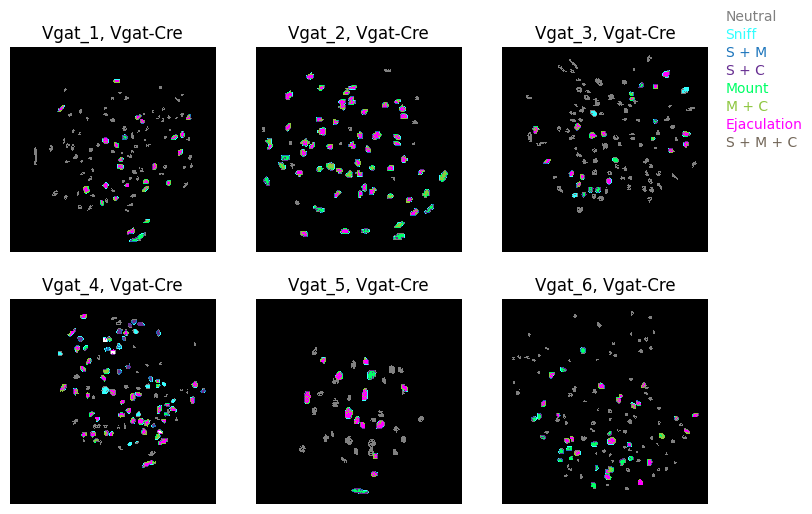

In [37]:
# Plot the cell maps for Vglut2 cells
Mouse_line = 'Vgat-Cre'
IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()

fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    mask = cell_map_dict[data_key]['mask']
    cell_type_list = np.array(['None'] * int(np.max(mask)),dtype ='object')
    cell_type_map = np.zeros(mask.shape)

    for bidx,TYPE in enumerate(types):
        __,__,cells = np.intersect1d(analysis_metainfo[analysis_metainfo.magnitude_cell_types == TYPE].index,\
                                     analysis_metainfo[analysis_metainfo.data_key == data_key].index,\
                              return_indices = True)
        #print(cells)
        cell_type_list[cells] = TYPE
    
    for tidx,t in enumerate(types):
        #print("Processing {} and adding {}".format(t,tidx))
        for cidx,cell in    enumerate(np.where(cell_type_list == t)[0]):

            cell_type_map[mask == cell +1] = tidx+1

    cmap = mpl.colors.ListedColormap(colors)
    boundaries = range(len(colors))
    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)    
    axs.flat[d_idx].imshow(cell_type_map,cmap =cmap , norm=norm)

    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {Mouse_line}",fontsize = 12)
[fig.text(s = labels[sidx],x = 0.92,y = 0.95 - sidx * 0.03,c = colors[sidx]) for sidx in range(len(types))]
fig.savefig(os.path.join(figurepath,'Figure4E_{}_cell_type_map.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure4E_{}_cell_type_map.pdf'.format(Mouse_line)),dpi = 1028,format = 'pdf',bbox_inches = 'tight')    


# Figure S7

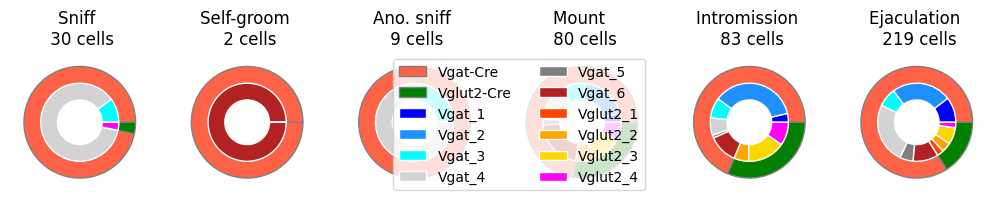

In [38]:
# Visualize the proportion of cells that were from each experiment subject.
# First plot for positive responding cells.

# Specify the behaviors to be used in the analysis.
analysis_behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# Variables for plotting
size = 0.3

# Mouse lines and animal_IDs used in the analysis
Mouse_line_labels = analysis_metainfo.Mouse_line.unique()
ID_labels =  np.append(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].ID.unique(),
analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].ID.unique())

# Create a list of colors for each ID
ID_cmap = ['blue','dodgerblue','cyan','lightgray','gray','firebrick','orangered','orange','gold','magenta']

# Plot the pie chart
fig,axs = plt.subplots(1,len(analysis_behaviors),figsize = (2.1*len(analysis_behaviors),3))
for idx,behavior in enumerate(analysis_behaviors):
    Mouse_line_data = [np.count_nonzero(analysis_metainfo.loc[analysis_metainfo[behavior + '_positive_responding_cells'],'Mouse_line'] == f) for f in Mouse_line_labels]
    axs[idx].pie(Mouse_line_data,normalize = True,radius=1,\
        colors = ['tomato','green'],wedgeprops=dict(width=size, edgecolor='gray'))
    
    ID_data = [np.count_nonzero(analysis_metainfo.loc[analysis_metainfo[behavior + '_positive_responding_cells'],'ID'] == f) for f in ID_labels]
    axs[idx].pie(ID_data,normalize = True,radius=1 - size,colors = ID_cmap,\
        wedgeprops=dict(width=size, edgecolor='w'))  
    
    axs[idx].set_title(titles[idx] + ' \n ' + str(np.sum(Mouse_line_data)) + ' cells')
axs[3].legend(labels=np.append(Mouse_line_labels,ID_labels), ncol = 2,loc='best')
fig.savefig(os.path.join(figurepath,'FigureS7_positive.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'FigureS7_positive.pdf'),format = 'pdf',bbox_inches = 'tight')

In [39]:
# Visualize the proportion of cells that were from each experiment subject.
# Next plot for negative responding cells.

# Specify the behaviors to be used in the analysis.
analysis_behaviors = ['Sniff','Grooming','Male_anogenital_sniffing','Mount','Intromission','Ejaculation']
titles = ['Sniff','Self-groom','Ano. sniff','Mount','Intromission','Ejaculation']

# Variables for plotting
size = 0.3

# Mouse lines and animal_IDs used in the analysis
Mouse_line_labels = analysis_metainfo.Mouse_line.unique()
ID_labels =  np.append(analysis_metainfo[analysis_metainfo.Mouse_line == 'Vgat-Cre'].ID.unique(),
analysis_metainfo[analysis_metainfo.Mouse_line == 'Vglut2-Cre'].ID.unique())

# Create a list of colors for each ID
ID_cmap = ['blue','dodgerblue','cyan','lightgray','gray','firebrick','orangered','orange','gold','magenta']


for idx,behavior in enumerate(analysis_behaviors):
    Mouse_line_data = [np.count_nonzero(analysis_metainfo.loc[analysis_metainfo[behavior + '_negative_responding_cells'],'Mouse_line'] == f) for f in Mouse_line_labels]
    if Mouse_line_data[0] == 0:
        continue
    axs[idx].pie(Mouse_line_data,normalize = True,radius=1,\
        colors = ['tomato','green'],wedgeprops=dict(width=size, edgecolor='gray'))
    
    ID_data = [np.count_nonzero(analysis_metainfo.loc[analysis_metainfo[behavior + '_negative_responding_cells'],'ID'] == f) for f in ID_labels]
    axs[idx].pie(ID_data,normalize = True,radius=1 - size,colors = ID_cmap,\
        wedgeprops=dict(width=size, edgecolor='w'))  
    
    axs[idx].set_title(titles[idx] + ' \n ' + str(np.sum(Mouse_line_data)) + ' cells')
axs[3].legend(labels=np.append(Mouse_line_labels,ID_labels), ncol = 2,loc='best')
fig.savefig(os.path.join(figurepath,'FigureS7_negative.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'FigureS7_negative.pdf'),format = 'pdf',bbox_inches = 'tight')

# Figure 5A

In [40]:
# Parameters which will be used in the analysis.
# long_event_duration_seconds: The window to analyze after the onset of mating completion in seconds.
# long_event_duration_frames: The window to analyze after the onset of mating completion in frames.

long_event_duration_seconds = 120 
long_event_duration_frames = long_event_duration_seconds * signal_framerate

In [41]:
# Load the preprocessed result.
# This will be used throughout the analysis.
# The result will store all the cells that were imaged and anlyzed, and averaged zscored peri event response magnitude.
# BEHAVIOR_positive_responding_cells/_negative_responding_cells: Columns indicating cells that respond to a BEHAVIOR. abs(magnitude_zscore) > 2 was chategorized as "responding_cell".
# Ejaculation_long_labels: The cell type class which is used for further analysis. 
# This class will contain a label indicating the type it was chategorized in after the spectral typeing.

analysis_metainfo = pd.read_csv(os.path.join(resultfolderpath,'male_analysis_magnitude.csv'),index_col = None)

In [42]:
# Subset the data frame to only contain cells that positively responded to mating completion
responding_analysis_metainfo = analysis_metainfo.loc[(analysis_metainfo.Ejaculation_positive_responding_cells),:].reset_index()


In [43]:
# Load the zscored array around mating completion
zscores = np.load(os.path.join(resultfolderpath,'Ejaculation_longer_all_norm_zscore_snip_array.npy'))
responding_zscores = zscores[:,(analysis_metainfo.Ejaculation_positive_responding_cells)]
data_array = responding_zscores.T

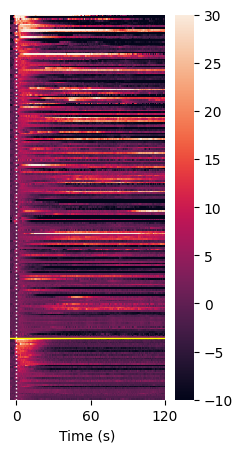

In [44]:
# Plot heat map for all the cells that positively respond to mating completion.
# Reorder the cells by the mouse line and the response magnitude.

fig,axs = plt.subplots(1,1,figsize = (2.5,5))

sortindex = np.argsort(responding_analysis_metainfo.Mouse_line == 'Vgat-Cre')
sortindex = responding_analysis_metainfo.sort_values(by=['Mouse_line','Ejaculation_zscore_magnitude',],ascending=[True,False]).index
sns.heatmap(data_array[sortindex],ax = axs,vmin = -10,vmax = 30,rasterized=True)

axs.set_xticks(np.linspace(before_frames,(before_frames+long_event_duration_frames),\
    3 ))
axs.set_xticklabels(np.linspace(0,long_event_duration_seconds,\
    3,dtype = 'int')\
                    ,rotation = 0)
axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
ncells = len(sortindex)
axs.axhline(sum(responding_analysis_metainfo.Mouse_line == 'Vgat-Cre'),\
    color = 'yellow',linestyle = 'solid',linewidth = 1)

axs.set_yticks([])
axs.set_yticklabels('')
axs.set_xlabel('Time (s)')

fig.savefig(os.path.join(figurepath,'Figure5A.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure5A.pdf'),format = 'pdf',bbox_inches = 'tight')

# Figure 5B

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\3615230726.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(np.linspace(-10,15,6))
C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7124\3615230726.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(np.linspace(-10,15,6))


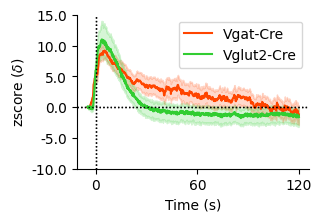

In [45]:
# Plot the averaged signal of Vgat and Vglut2 cells after mating completion as a lineplot for Figure 5B
fig,axs = plt.subplots(1,1,figsize = (3,2))
for idx,Mouse_line in enumerate(['Vgat-Cre','Vglut2-Cre']):
    temparray = data_array[(responding_analysis_metainfo.Mouse_line == Mouse_line),:]
    temparray = temparray - np.nanmean(temparray[:,:5],axis = 1)[:,None]
    if len(temparray) == 0:
        continue
    tempdf = pd.DataFrame(temparray.T,index = np.linspace(-before_window,long_event_duration_seconds,\
        int(long_event_duration_seconds+before_window) * signal_framerate)).stack().reset_index()
    tempdf.columns = ['Time (s)','cell_id','zscore']
    sns.lineplot(data = tempdf, x = 'Time (s)',y = 'zscore',ax = axs,label = Mouse_line,color = ['orangered','limegreen'][idx])
    axs.axvline(0,color = 'black',linestyle = ':',linewidth = 1)
    axs.axhline(0,color = 'black',linestyle = ':',linewidth = 1)
    axs.set_xticks(np.linspace(0,(0+long_event_duration_seconds),int((0+long_event_duration_seconds)/(60)) +1 ))
    axs.set_xticklabels(np.linspace(0,long_event_duration_seconds,int((before_frames+long_event_duration_frames)/(signal_framerate*60)) +1 ,dtype = 'int')\
                            ,rotation = 0)
    axs.set_ylim(-10,15)
    axs.set_yticklabels(np.linspace(-10,15,6))
    axs.set_ylabel('zscore ($\delta$)')
    axs.set_xlabel('Time (s)')
    #axs.set_title(Mouse_line)
    sns.despine()

fig.savefig(os.path.join(figurepath,'Figure5B.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure5B.pdf'),format = 'pdf',bbox_inches='tight')    

# Figure 5C

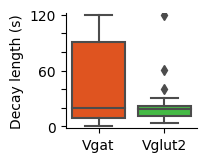

In [46]:
# Plot decay length for Figure 5C
fig,axs = plt.subplots(1,1,figsize = (1.7,1.5))
sns.boxplot(data = responding_analysis_metainfo,
y = 'Ejaculation_decay_length_seconds',x ='Mouse_line' ,ax = axs,palette = ['orangered','limegreen'])
axs.set_ylabel('Decay length (s)')
sns.despine()
axs.set_ylim(-2,122)
axs.set_yticks([0,20,40,60,80,100,120])
axs.set_yticklabels([0,'','',60,'','',120])
axs.set_xlabel('')
axs.set_xticklabels(['Vgat','Vglut2'])
fig.savefig(os.path.join(figurepath,'Figure5C.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure5C.pdf'),format = 'pdf',bbox_inches='tight')    

In [47]:
# Statistical test for Figure 5C
# extract decay length from vgat and vglut2 populations
vgat = analysis_metainfo[(analysis_metainfo.Ejaculation_positive_responding_cells) & (analysis_metainfo.Mouse_line == 'Vgat-Cre')].Ejaculation_decay_length_seconds
vglut2 = analysis_metainfo[(analysis_metainfo.Ejaculation_positive_responding_cells) & (analysis_metainfo.Mouse_line == 'Vglut2-Cre')].Ejaculation_decay_length_seconds

# run ttest-ind on vgat and vglut2 populations
decay_length_ttest = stats.ttest_ind(vgat,vglut2)
print(decay_length_ttest)
# save results
import pickle
with open(os.path.join(statspath,'Figure5C_ttest.pickle'), 'wb') as handle:
    pickle.dump(decay_length_ttest, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append the Wilcoxon result to manuscript_statistic_file
ttest_bonferroni_correction = pd.DataFrame([{
    'Figure': 'Figure5C',
    'variable':'Decay length (s)',
    'Type of Test': 'Students t-test',
    'Detail': f'Vgat vs Vglut2',
    'statistic description': f't({len(vgat) + len(vglut2)-2})',  # Showing "n" for each group
    'statistic': decay_length_ttest[0],
    'p Value': decay_length_ttest[1]
}])
# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest_bonferroni_correction], ignore_index=True)


Ttest_indResult(statistic=3.039653717189849, pvalue=0.002659548181318242)


# Figure 5D

In [48]:
# Load the clustering results
# The spectral clustering is conducted in a separate jupyter notebook ("Figure 5 Spectral clustering.ipynb")
newlabels = np.load(os.path.join(clusteringpath, '202308071543_spectral_clusterlabels.npy'),)
responding_analysis_metainfo['Ejaculation_long_labels'] = newlabels + 1 # make it start from 1

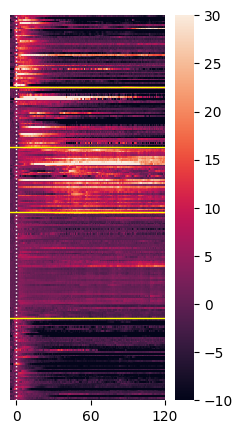

In [49]:
# Plot heat map for the cells that positively respond to mating completion.
# Reorder the cells by cell type and the response magnitude.

newlabels = responding_analysis_metainfo['Ejaculation_long_labels']
uniquelabels = np.sort(responding_analysis_metainfo['Ejaculation_long_labels'].unique())

fig,axs = plt.subplots(1,1,figsize = (2.5,5))

sortindex = np.argsort(newlabels)
sns.heatmap(data_array[sortindex],ax = axs,vmin = -10,vmax = 30,rasterized=True)

axs.set_xticks(np.linspace(before_frames,(before_frames+long_event_duration_frames),\
    3 ))
axs.set_xticklabels(np.linspace(0,long_event_duration_seconds,\
    3,dtype = 'int')\
                    ,rotation = 0)
axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
ncells = len(sortindex)

border = []
for n in uniquelabels[:-1]:

    index_list = np.where(np.sort(newlabels) == n)[0]
    if len(index_list) == 0:
        continue
    else:
        border.append(index_list[-1])
[axs.axhline(b,color = 'yellow',linestyle = 'solid',linewidth = 1) for b in border]

#axs.set_title('After typeing')
axs.set_yticks([])
axs.set_yticklabels('')

fig.savefig(os.path.join(figurepath,'Figure5D.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure5D.pdf'),format = 'pdf',bbox_inches='tight')    

# Figure 5F

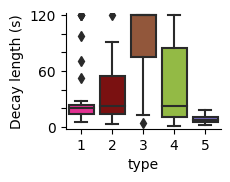

In [50]:
# Plot decay length for cells in each type for Figure 5F

fig,axs = plt.subplots(1,1,figsize = (2,1.5),sharey = True,sharex = True)

sns.boxplot(data = responding_analysis_metainfo,x = 'Ejaculation_long_labels',\
    y = 'Ejaculation_decay_length_seconds',ax = axs,palette = ['deeppink','darkred','sienna','yellowgreen','slateblue'])
sns.despine()
axs.set_xticks(range(0,5))
#axs.set_xticklabels(['1','2','3','4','5'])
axs.set_xlabel('type')
axs.set_ylabel('Decay length (s)')
axs.set_ylim(-2,122)
axs.set_yticks([0,20,40,60,80,100,120])
axs.set_yticklabels([0,'','',60,'','',120])

fig.savefig(os.path.join(figurepath,'Figure5F.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure5F.pdf'),format = 'pdf',bbox_inches='tight')    

In [51]:
# First test if there is a difference in the average decay length between the 5 types.

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Ejaculation_decay_length_seconds ~ C(Ejaculation_long_labels)', data=responding_analysis_metainfo).fit()
sm.stats.anova_lm(model, typ=2)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(responding_analysis_metainfo['Ejaculation_decay_length_seconds'],\
    responding_analysis_metainfo['Ejaculation_long_labels'])
tukey_summary = tukey_results.summary()

# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure5F_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': 'Figure5F',
        'variable':behavior,
        'Type of Test': 'Tukey HSD',
        'Detail': f'Type {int(group1)} vs Type {int(group2)}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])
    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

# Figure 5G

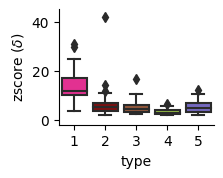

In [53]:
# Plot average zscored response magnitude for cells in each type for Figure 5G

fig,axs = plt.subplots(1,1,figsize = (2,1.5),sharey = True,sharex = True)

sns.boxplot(data = responding_analysis_metainfo,x = 'Ejaculation_long_labels',\
    y = 'Ejaculation_zscore_magnitude',ax = axs,palette = ['deeppink','darkred','sienna','yellowgreen','slateblue'])
sns.despine()
axs.set_xticks(range(0,5))
axs.set_xticklabels(['1','2','3','4','5'])
axs.set_xlabel('type')
axs.set_ylabel('zscore ($\delta$)')
axs.set_ylim(-2,45)
#axs.set_yticks([0,20,40,60,80,100,120])
#axs.set_yticklabels([0,'','',60,'','',120])

fig.savefig(os.path.join(figurepath,'Figure5G.png'),format = 'png',bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure5G.pdf'),format = 'pdf',bbox_inches='tight')    

In [54]:
# First test if there is a difference in the average zscored response magnitude between the 5 types.

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Ejaculation_zscore_magnitude ~ C(Ejaculation_long_labels)', data=responding_analysis_metainfo).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Ejaculation_long_labels),2940.265401,4.0,44.840195,2.563080e-27
Residual,3508.106900,214.0,NaN,NaN


In [55]:
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(responding_analysis_metainfo['Ejaculation_zscore_magnitude'],\
    responding_analysis_metainfo['Ejaculation_long_labels'])
tukey_summary = tukey_results.summary()

# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure5G_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': 'Figure5G',
        'variable':behavior,
        'Type of Test': 'Tukey HSD',
        'Detail': f'Type {int(group1)} vs Type {int(group2)}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])
    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

In [56]:
manuscript_statistic_file

,Figure,variable,Type of Test,Detail,statistic description,statistic,p Value
0,Figure1G,Number_of_Isolation_zone_entry_per_10min,Repeated Measures ANOVA,across states,"F(2.0,16.0)",10.887558,0.001036
1,Figure1G,Number_of_Isolation_zone_entry_per_10min,Tukey HSD,Control vs Post_Ejaculation,NaN,-4.609300,0.001500
2,Figure1G,Number_of_Isolation_zone_entry_per_10min,Tukey HSD,Control vs Pre_Ejaculation,NaN,-1.070900,0.628400
3,Figure1G,Number_of_Isolation_zone_entry_per_10min,Tukey HSD,Post_Ejaculation vs Pre_Ejaculation,NaN,3.538400,0.014200
4,Figure1H,Duration_second,Repeated Measures ANOVA,across states,"F(2.0,16.0)",14.344437,0.000270
...,...,...,...,...,...,...,...
90,Figure5G,Ejaculation,Tukey HSD,Type 2 vs Type 4,N/A,-3.386400,0.001200
91,Figure5G,Ejaculation,Tukey HSD,Type 2 vs Type 5,N/A,-1.373300,0.563800
92,Figure5G,Ejaculation,Tukey HSD,Type 3 vs Type 4,N/A,-2.105400,0.097200
93,Figure5G,Ejaculation,Tukey HSD,Type 3 vs Type 5,N/A,-0.092300,1.000000


# Figure 5H and 5I

184
35


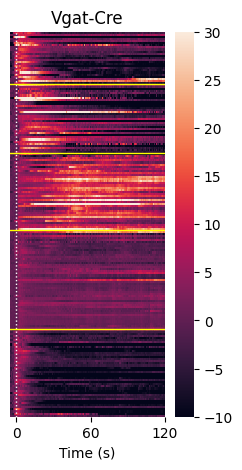

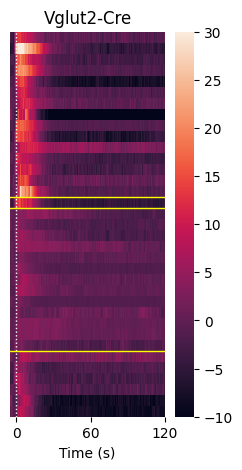

In [57]:
# Plot heat map for the Vgat and Vglut2 cells that positively respond to mating completion.
# Reorder the cells by cell type and the response magnitude.

for iidx,Mouse_line in enumerate(['Vgat-Cre','Vglut2-Cre']):
    fig,axs = plt.subplots(1,1,figsize = (2.5,5))

    #axs = ax[iidx]
    #sortindex = np.argsort(np.mean(data_array[(responding_analysis_metainfo.Mouse_line == Mouse_line),before_frames:before_frames+after_window_for_quantification*signal_framerate],axis = 1))[::-1]
    sortindex = np.argsort(newlabels[np.where((responding_analysis_metainfo.Mouse_line == Mouse_line))[0]])
    print(len(sortindex))
    sns.heatmap(data_array[np.where((responding_analysis_metainfo.Mouse_line == Mouse_line))[0],:][sortindex]
                ,ax = axs,vmin = -10,vmax = 30,rasterized = True)

    axs.set_xticks(np.linspace(before_frames,(before_frames+long_event_duration_frames),3 ))
    axs.set_xticklabels(np.linspace(0,long_event_duration_seconds,3 ,dtype = 'int')\
                        ,rotation = 0)
    axs.axvline(before_frames,color = 'white',linestyle = ':',linewidth = 1)
    ncells = len(sortindex)

    border = []
    for n in uniquelabels[:-1]:
        
        index_list = np.where(np.sort(newlabels[np.where((responding_analysis_metainfo.Mouse_line == Mouse_line))[0]]) == n)[0]
        if len(index_list) == 0:
            continue
        else:
            border.append(index_list[-1])
    [axs.axhline(b,color = 'yellow',linestyle = 'solid',linewidth = 1) for b in border]

    axs.set_title(Mouse_line)
    axs.set_yticks([])
    axs.set_yticklabels('')
    axs.set_xlabel('Time (s)')
    fig.savefig(os.path.join(figurepath,'Figure5G-{}.png'.format(Mouse_line)),format = 'png',bbox_inches='tight',dpi = 216)
    fig.savefig(os.path.join(figurepath,'Figure5G-{}.pdf'.format(Mouse_line)),format = 'pdf',bbox_inches='tight')    

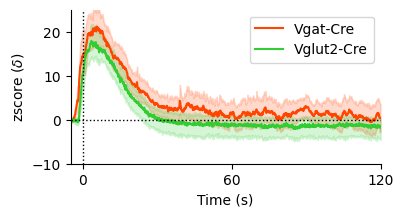

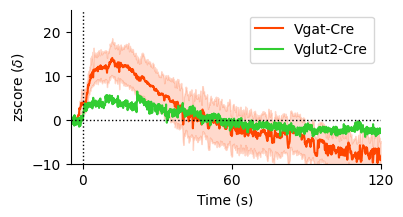

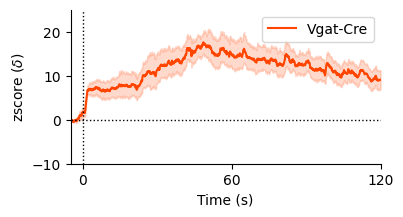

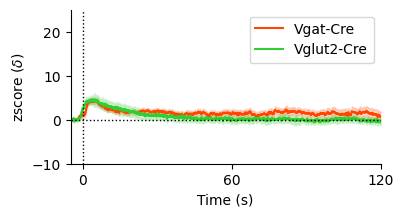

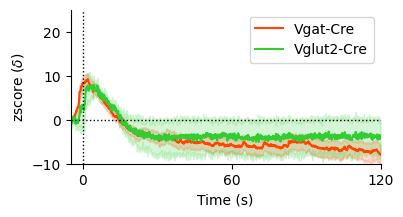

In [58]:
# Plot the averaged signal of cells in each type after mating completion as a lineplot for Figure 5J

from enum import unique


for idx in uniquelabels:
    fig,ax = plt.subplots(1,1,figsize = (4,2))
    axs = ax
    #sns.heatmap(data_array[newlabels == idx,:],ax = axs[idx],vmin = -10,vmax = 50)
    for midx,Mouse_line in enumerate(['Vgat-Cre','Vglut2-Cre']):
        temparray = data_array[(newlabels == idx)&(responding_analysis_metainfo.Mouse_line == Mouse_line),:]
        temparray = temparray - np.nanmean(temparray[:,:5],axis = 1)[:,None]
        if len(temparray) == 0:
            continue
        tempdf = pd.DataFrame(temparray.T,index = np.linspace(-before_window,long_event_duration_seconds,\
            int(long_event_duration_seconds+before_window) * signal_framerate)).stack().reset_index()
        tempdf.columns = ['Time (s)','cell_id','zscore']
        sns.lineplot(data = tempdf, x = 'Time (s)',y = 'zscore',ax = axs,label = Mouse_line,color = ['orangered','limegreen'][midx])
    axs.axvline(0,color = 'black',linestyle = ':',linewidth = 1)
    axs.axhline(0,color = 'black',linestyle = ':',linewidth = 1)
    axs.set_xlim(-before_window,long_event_duration_seconds)
    axs.set_ylim(-10,25)
    axs.set_ylabel('zscore ($\delta$)')
    axs.set_xlabel('Time (s)')
    axs.set_xticks(np.linspace(0,(long_event_duration_seconds),3 ))
    axs.set_xticklabels(np.linspace(0,long_event_duration_seconds,3 ,dtype = 'int')\
                        ,rotation = 0)
    #axs.set_title(Mouse_line)
    sns.despine()
    fig.savefig(os.path.join(figurepath,'Figure5J_type' + str(idx + 1) +'.png'),format = 'png',bbox_inches='tight')

    fig.savefig(os.path.join(figurepath,'Figure5J_type' + str(idx + 1) +'.pdf'),format = 'pdf',bbox_inches='tight')    

# Figure 5K

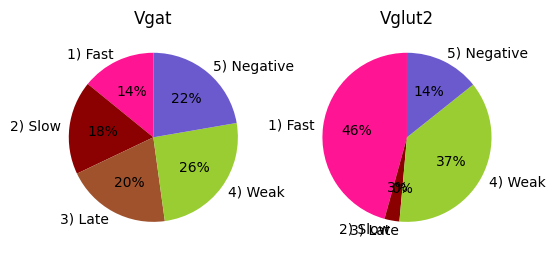

In [59]:
# Plot pie chart showing the proportion of cells in each type.

fig,axs = plt.subplots(1,2,figsize = (3*2,3))
names = ['1) Fast','2) Slow','3) Late','4) Weak','5) Negative']
vgat = np.unique(responding_analysis_metainfo[responding_analysis_metainfo.Mouse_line == 'Vgat-Cre'].Ejaculation_long_labels,return_counts = True)[1]
vglut2 = np.unique(responding_analysis_metainfo.Ejaculation_long_labels,return_counts = True)[1] - vgat

axs[0].pie(vgat,normalize = True,radius=1,startangle = 90,labels= names,autopct='%1.0f%%',\
colors = ['deeppink','darkred','sienna','yellowgreen','slateblue'])
axs[1].pie(vglut2,normalize = True,radius=1,startangle = 90,labels = names,autopct='%1.0f%%',\
colors = ['deeppink','darkred','sienna','yellowgreen','slateblue'])
axs[0].set_title('Vgat')
axs[1].set_title('Vglut2')
fig.savefig(os.path.join(figurepath,'Figure5K.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure5K.pdf'),format = 'pdf',bbox_inches = 'tight')

In [60]:
# conduct chi-square test to test difference in the proportion of cells for each type.

# Reformat the analysis result to calculate the proportion of cells in each type
temp_meta_df = responding_analysis_metainfo.groupby(['Mouse_line','Ejaculation_long_labels']).count().unstack(fill_value=0).stack()['ID'].reset_index().rename(columns = {'ID':'ncells'})
ncells_type = responding_analysis_metainfo.groupby(['Ejaculation_long_labels']).count().ID.to_frame().reset_index().rename(columns ={'ID':'ncells_type'})
total_ncells_meta = temp_meta_df.groupby('Mouse_line').sum()['ncells'].reset_index().rename(columns = {'ncells':'total_ncells'})
temp_meta_df = temp_meta_df.merge(total_ncells_meta,left_on='Mouse_line',right_on = 'Mouse_line')
temp_meta_df = temp_meta_df.merge(ncells_type,left_on='Ejaculation_long_labels',right_on = 'Ejaculation_long_labels')
temp_meta_df['proportion'] = temp_meta_df.ncells/temp_meta_df.total_ncells
temp_meta_df

import statsmodels.stats.proportion as prp 
import statsmodels.stats.multitest as multitest

# Run Chi-square test
pvalues = []
for type in np.sort(temp_meta_df.Ejaculation_long_labels.unique()):
    #print(type)
    (__,p,__) = prp.proportions_chisquare(temp_meta_df[temp_meta_df.Ejaculation_long_labels == type].ncells.values,
                          temp_meta_df[temp_meta_df.Ejaculation_long_labels == type].total_ncells.values)
    pvalues.append(p)
    #print(p)


# correct multiple comparison
Figure5K_chisquare_bonferroni_correction = multitest.multipletests(pvalues,method = 'bonferroni')
(reject,corr_pvalues,__,__) = Figure5K_chisquare_bonferroni_correction
[print('type',int(type),':',corr_p) for type,corr_p in zip(np.sort(temp_meta_df.Ejaculation_long_labels.unique()),corr_pvalues)]

# save results
import pickle
with open(os.path.join(statspath,'Figure5K_chisquare_bonferroni_correction.pickle'), 'wb') as handle:
    pickle.dump(Figure5K_chisquare_bonferroni_correction, handle, protocol=pickle.HIGHEST_PROTOCOL)

type 1 : 6.79769860169816e-05
type 2 : 0.11981082293427757
type 3 : 0.01806394337394686
type 4 : 0.7921883469342684
type 5 : 1.0


In [61]:
for k in range(5):
    k = k +1
    temp_meta_df.loc[temp_meta_df['Ejaculation_long_labels'] == k,'Ejaculation_long_labels'] = 'Type ' + str(k+1)

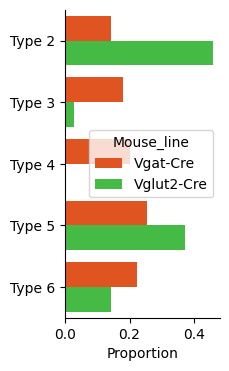

In [62]:
fig,axs = plt.subplots(1,1,figsize = (2,4))
sns.barplot(data = temp_meta_df,y = 'Ejaculation_long_labels',x = 'proportion',hue = 'Mouse_line',ax = axs,\
            palette = ['orangered','limegreen'])
sns.despine()
axs.set_ylabel('')
axs.set_xlabel('Proportion')
fig.savefig(os.path.join(figurepath,'Figure5K-barplot.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure5K-barplot.pdf'),format = 'pdf',bbox_inches = 'tight')

# Figure 5L

In [63]:
# Subset the data frame to only contain cells that positively responded to mating completion
responding_analysis_metainfo = analysis_metainfo.loc[(analysis_metainfo.Ejaculation_positive_responding_cells),:].reset_index()
# Load the clustering results
# The spectral clustering is conducted in a separate jupyter notebook ("Figure 5 Spectral clustering.ipynb")
newlabels = np.load(os.path.join(clusteringpath, '202308071543_spectral_clusterlabels.npy'),)
responding_analysis_metainfo['Ejaculation_long_labels'] = newlabels # make it start from 1

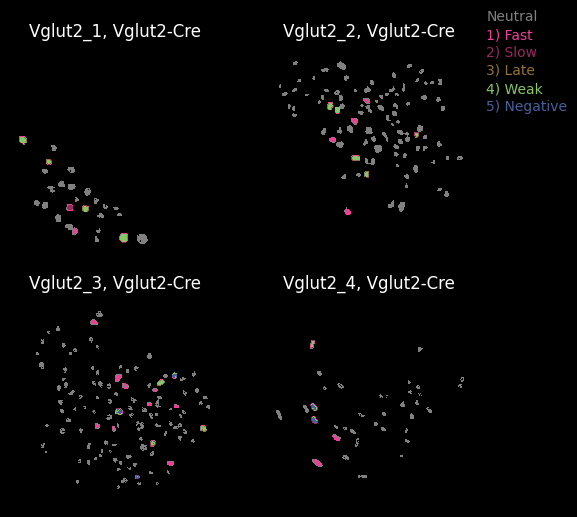

In [64]:
# Plot the cell types defnied by response magnitude onto the cell map.

# First setup parameters.
types =     ['nan',
            '0.0',
            '1.0',
            '2.0',
            '3.0',
            '4.0',
            '']
colors =    ['k',
            'gray',
            '#ED3F96',
            '#962A5F',
            '#957236',
            '#86C668',
            '#46619D',
            '#46619D']
labels =    ['',
            'Neutral',
            '1) Fast',
            '2) Slow',
            '3) Late',
            '4) Weak',
            '5) Negative',
            '',
            ]
plt.style.use('dark_background')

# Plot the cell maps for Vglut2 cells
Mouse_line = 'Vglut2-Cre'
IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()

fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    mask = cell_map_dict[data_key]['mask']
    cell_type_list = np.array(['None'] * int(np.max(mask)),dtype ='object')
    cell_type_map = np.zeros(mask.shape)

    for bidx,TYPE in enumerate(types):
        __,__,cells = np.intersect1d(analysis_metainfo[analysis_metainfo.Ejaculation_long_labels.astype('str') == TYPE].index,\
                                     analysis_metainfo[analysis_metainfo.data_key == data_key].index,\
                              return_indices = True)
        #print(cells)
        cell_type_list[cells] = TYPE
    
    for tidx,t in enumerate(types):
        #print("Processing {} and adding {}".format(t,tidx))
        for cidx,cell in    enumerate(np.where(cell_type_list == t)[0]):
            #print(cell)
            cell_type_map[mask == cell +1] = tidx +1 

    cmap = mpl.colors.ListedColormap(colors)
    boundaries = range(len(colors))
    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)    
    axs.flat[d_idx].imshow(cell_type_map,cmap =cmap , norm=norm)

    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {Mouse_line}",fontsize = 12)
[fig.text(s = labels[sidx],x = 0.92,y = 0.95 - sidx * 0.03,c = colors[sidx]) for sidx in range(len(types))]
fig.savefig(os.path.join(figurepath,'Figure5L_{}_cell_type_map.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure5L_{}_cell_type_map.pdf'.format(Mouse_line)),dpi = 1028,format = 'pdf',bbox_inches = 'tight')    


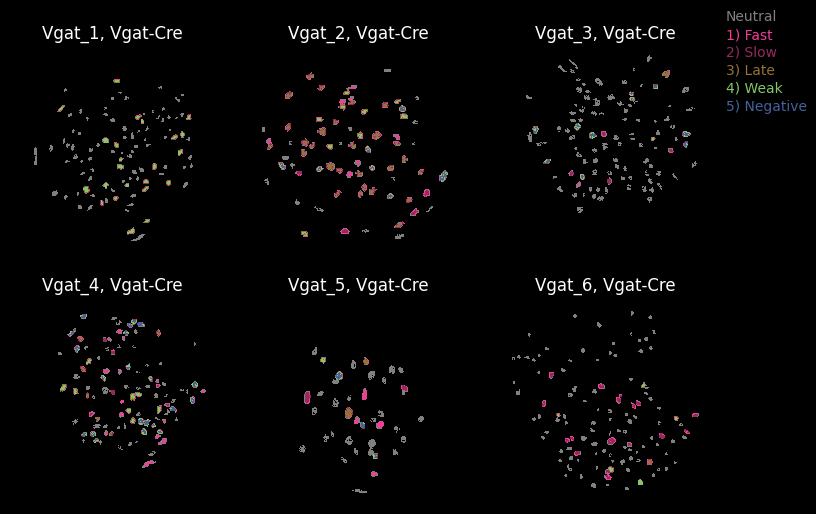

In [65]:

# Plot the cell maps for Vgat cells
Mouse_line = 'Vgat-Cre'
IDs = analysis_metainfo[analysis_metainfo.Mouse_line == Mouse_line].ID.unique()

fig,axs = plt.subplots(2,len(IDs)//2,figsize = (3*len(IDs)//2 , 3*2))
for d_idx,ID in enumerate(IDs):
    data_key,Mouse_line = analysis_metainfo.loc[analysis_metainfo.ID == ID,['data_key','Mouse_line']].values[0]
    mask = cell_map_dict[data_key]['mask']
    cell_type_list = np.array(['None'] * int(np.max(mask)),dtype ='object')
    cell_type_map = np.zeros(mask.shape)

    for bidx,TYPE in enumerate(types):
        __,__,cells = np.intersect1d(analysis_metainfo[analysis_metainfo.Ejaculation_long_labels.astype('str') == TYPE].index,\
                                     analysis_metainfo[analysis_metainfo.data_key == data_key].index,\
                              return_indices = True)
        #print(cells)
        cell_type_list[cells] = TYPE
    
    for tidx,t in enumerate(types):
        #print("Processing {} and adding {}".format(t,tidx))
        for cidx,cell in    enumerate(np.where(cell_type_list == t)[0]):

            cell_type_map[mask == cell +1] = tidx +1 

    cmap = mpl.colors.ListedColormap(colors)
    boundaries = range(len(colors))
    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)    
    axs.flat[d_idx].imshow(cell_type_map,cmap =cmap , norm=norm)

    axs.flat[d_idx].axis('off')
    axs.flat[d_idx].set_title(f"{ID}, {Mouse_line}",fontsize = 12)
[fig.text(s = labels[sidx],x = 0.92,y = 0.95 - sidx * 0.03,c = colors[sidx]) for sidx in range(len(types))]
fig.savefig(os.path.join(figurepath,'Figure5L_{}_cell_type_map.png'.format(Mouse_line)),dpi = 1028,format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'Figure5L_{}_cell_type_map.pdf'.format(Mouse_line)),dpi = 1028,format = 'pdf',bbox_inches = 'tight')    


# Figure S6

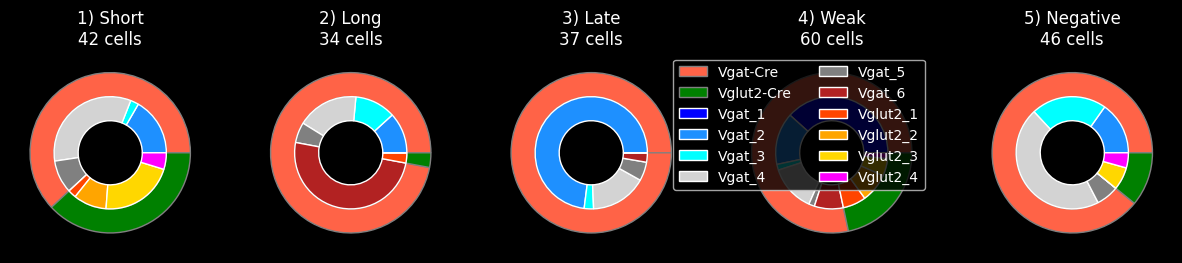

In [66]:
#plt.style.use('default')

size = 0.3

Mouse_line_labels = responding_analysis_metainfo.Mouse_line.unique()
ID_labels =  np.append(responding_analysis_metainfo[responding_analysis_metainfo.Mouse_line == 'Vgat-Cre'].ID.unique(),
responding_analysis_metainfo[responding_analysis_metainfo.Mouse_line == 'Vglut2-Cre'].ID.unique())
fig,axs = plt.subplots(1,len(responding_analysis_metainfo['Ejaculation_long_labels'].unique()),figsize = (3*len(responding_analysis_metainfo['Ejaculation_long_labels'].unique()),3))
#ID_cmap = np.concatenate([pltcl.ListedColormap(LaJolla_6.mpl_colors)(range(len(responding_analysis_metainfo[responding_analysis_metainfo.Mouse_line == Mouse_line_labels[0]].ID.unique()))), \
#pltcl.ListedColormap(Devon_5.mpl_colors)(range(len(responding_analysis_metainfo[responding_analysis_metainfo.Mouse_line == Mouse_line_labels[1]].ID.unique())))],axis = 0)
# Create a list of colors for each ID
ID_cmap = ['blue','dodgerblue','cyan','lightgray','gray','firebrick','orangered','orange','gold','magenta']

celltype_discription = ['1) Short','2) Long','3) Late','4) Weak','5) Negative']
for idx,cluster in enumerate(np.sort(responding_analysis_metainfo['Ejaculation_long_labels'].unique())):
    Mouse_line_data = [np.count_nonzero(responding_analysis_metainfo.loc[responding_analysis_metainfo['Ejaculation_long_labels'] == cluster,'Mouse_line'] == f) for f in Mouse_line_labels]
    axs[idx].pie(Mouse_line_data,normalize = True,radius=1,colors = ['tomato','green'],wedgeprops=dict(width=size, edgecolor='gray'))
    
    ID_data = [np.count_nonzero(responding_analysis_metainfo.loc[responding_analysis_metainfo['Ejaculation_long_labels'] == cluster,'ID'] == f) for f in ID_labels]
    axs[idx].pie(ID_data,normalize = True,radius=1 - size,colors = ID_cmap,wedgeprops=dict(width=size, edgecolor='w'))  
    
    axs[idx].set_title(f'{celltype_discription[idx]}\n' + str(np.sum(Mouse_line_data)) + ' cells')
axs[3].legend(labels=np.append(Mouse_line_labels,ID_labels), ncol = 2,loc='best')
fig.savefig(os.path.join(figurepath,'FigureS8.png'),format = 'png',bbox_inches = 'tight')
fig.savefig(os.path.join(figurepath,'FigureS8.pdf'),format = 'pdf',bbox_inches = 'tight')

In [67]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)